In [3]:
# Libs
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data import 
df = pd.read_csv("../data/raw/BindingDB_BindingDB_Articles.tsv", sep="\t", low_memory=False, on_bad_lines='skip')

In [4]:
df.shape

(91745, 103)

In [5]:
df.head(5)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91745 entries, 0 to 91744
Columns: 103 entries, BindingDB Reactant_set_id to Unnamed: 102
dtypes: float64(29), int64(3), object(71)
memory usage: 72.1+ MB


In [6]:
# Interesting columns 
cols = ["Ligand SMILES", "BindingDB Target Chain Sequence", "IC50 (nM)", "Ki (nM)", "Kd (nM)"]
df = df[cols]

for col in ["IC50 (nM)", "Ki (nM)", "Kd (nM)"]:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Assign the first available non-null value from IC50, Ki, or Kd
df["affinity_nM"] = df["IC50 (nM)"]
df["affinity_nM"] = df["affinity_nM"].combine_first(df["Ki (nM)"])
df["affinity_nM"] = df["affinity_nM"].combine_first(df["Kd (nM)"])


# Drop rows with no SMILES, no sequence, or no affinity
df.dropna(subset=["Ligand SMILES", "BindingDB Target Chain Sequence", "affinity_nM"], inplace=True)

# Create the binary label
df["binary_label"] = df["affinity_nM"].apply(lambda x: 1 if x < 1000 else 0)


df.tail(10)

,Ligand SMILES,BindingDB Target Chain Sequence,IC50 (nM),Ki (nM),Kd (nM),affinity_nM,binary_label
91701,CC[C@H]1C[C@@H]2C[C@@H]3[C@H]1N(C2)CCc1c3[nH]c...,MNTSAPPAVSPNITVLAPGKGPWQVAFIGITTGLLSLATVTGNLLV...,NaN,22486.00,NaN,22486.00,0
91702,CC[C@H]1C[C@@H]2C[C@@H]3[C@H]1N(C2)CCc1c3[nH]c...,MNNSTNSSNNSLALTSPYKTFEVVFIVLVAGSLSLVTIIGNILVMV...,NaN,39409.00,NaN,39409.00,0
91703,CC[C@H]1C[C@@H]2C[C@@H]3[C@H]1N(C2)CCc1c3[nH]c...,MTLHNNSTTSPLFPNISSSWIHSPSDAGLPPGTVTHFGSYNVSRAA...,NaN,12500.00,NaN,12500.00,0
91705,CC[C@H]1C[C@@H]2C[C@@H]3[C@H]1N(C2)CCc1c3[nH]c...,MGRVGYWTLLVLPALLVWRGPAPSAAAEKGPPALNIAVMLGHSHDV...,NaN,2001.00,NaN,2001.00,0
91732,COC(=O)[C@@H]1C[C@H](OC(C)=O)C(=O)[C@H]2[C@@]1...,MDSPIQIFRGEPGPTCAPSACLPPNSSAWFPGWAEPDSNGSAGSED...,NaN,4.30,NaN,4.30,1
91740,CN1CC[C@@]23[C@H]4Oc5c2c(C[C@@H]1[C@@H]3C=C[C@...,MEPAPSAGAELQPPLFANASDAYPSACPSAGANASGPPGARSASSL...,NaN,1545.00,NaN,1545.00,0
91741,CN1CC[C@@]23[C@H]4Oc5c2c(C[C@@H]1[C@@H]3C=C[C@...,MDSPIQIFRGEPGPTCAPSACLPPNSSAWFPGWAEPDSNGSAGSED...,NaN,50.00,NaN,50.00,1
91742,CN1CC[C@@]23[C@H]4Oc5c2c(C[C@@H]1[C@@H]3C=C[C@...,MDSSAAPTNASNCTDALAYSSCSPAPSPGSWVNLSHLDGNLSDPCG...,NaN,0.81,NaN,0.81,1
91743,CCCCCc1cc(O)c2[C@@H]3C=C(C)CC[C@H]3C(C)(C)Oc2c1,MKSILDGLADTTFRTITTDLLYVGSNDIQYEDIKGDMASKLGYFPQ...,NaN,10.19,NaN,10.19,1
91744,CCCCCc1cc(O)c2[C@@H]3C=C(C)CC[C@H]3C(C)(C)Oc2c1,MEECWVTEIANGSKDGLDSNPMKDYMILSGPQKTAVAVLCTLLGLL...,NaN,16.85,NaN,16.85,1


/tmp/ipykernel_1484186/1244432521.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="binary_label", data=df, palette="Set2")


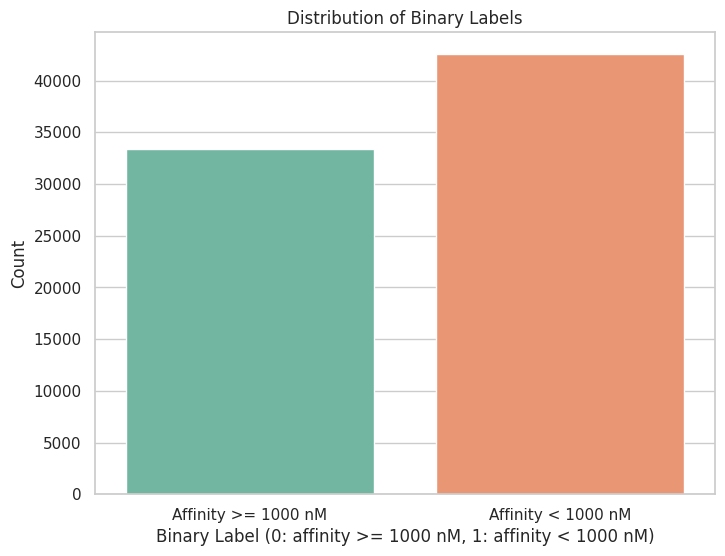

In [7]:
# Create a graph of the nuber of 0 in binary label and the number of 1 in binary label
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.countplot(x="binary_label", data=df, palette="Set2")
plt.title("Distribution of Binary Labels")
plt.xlabel("Binary Label (0: affinity >= 1000 nM, 1: affinity < 1000 nM)")
plt.ylabel("Count")
plt.xticks([0, 1], ["Affinity >= 1000 nM", "Affinity < 1000 nM"])
plt.show()


In [8]:
# Export the cleaned data, we want to keep the binary label, the SMILES and the sequence only 
df_cleaned = df[["Ligand SMILES", "BindingDB Target Chain Sequence", "binary_label"]]
# Rename columns for clarity
df_cleaned.columns = ["Ligand_SMILES", "BindingDB_Target_Chain_Sequence", "binary_label"]
# Save the cleaned data
df_cleaned.reset_index(drop=True, inplace=True)
df_cleaned.to_csv("../data/processed/BindingDB_cleaned_triplets.tsv", sep="\t", index=False)
print("Data cleaned and saved to ../data/processed/BindingDB_cleaned_triplets.tsv")


Data cleaned and saved to ../data/processed/BindingDB_cleaned_triplets.tsv


In [9]:
print(df_cleaned["Ligand_SMILES"].nunique())
print(df_cleaned["Ligand_SMILES"].head(10))

42657
0    COc1cc2c(Nc3cc(OC)c(OC)c(OC)c3)c(cnc2cc1OCCCN1...
1    COCCOc1cc2ncc(C#N)c(Nc3cc(OC)c(Cl)cc3Cl)c2cc1O...
2       COCCOc1cc2ncc(C#N)c(Nc3ccc(Cl)cc3Cl)c2cc1OCCOC
3    COCCOc1cc2ncc(C#N)c(Nc3cc(OC)c(OC)c(OC)c3)c2cc...
4      COCCOc1cc2ncc(C#N)c(Nc3cc(OC)c(Cl)cc3Cl)c2cc1OC
5          COCCOc1cc2ncc(C#N)c(Nc3ccc(Cl)cc3Cl)c2cc1OC
6    COCCOc1cc2ncc(C#N)c(Nc3cc(OC)c(OC)c(OC)c3)c2cc1OC
7    COc1cc(Nc2c(cnc3cc(OCC4CCN(C)CC4)c(OC)cc23)C#N...
8    COc1cc2c(Nc3ccc(Cl)cc3Cl)c(cnc2cc1OCC1CCN(C)CC...
9    COc1cc2c(Nc3cc(OC)c(OC)c(OC)c3)c(cnc2cc1OCC1CC...
Name: Ligand_SMILES, dtype: object
